In [1]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [5]:
#Create a list to append tweet data
tweets_list = []
maxTweets = 10000

#Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('paris climate agreement since:2021-01-20 until:2021-02-20').get_items()):
    if i > maxTweets:
        break
    tweets_list.append([tweet.content])

#Creating a dataframe from the tweets the list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])    

In [6]:
tweets_to_df.head(5) #lists first five tweets

,Tweets
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...
1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...
2,Official back in - Paris Climate Agreement #Pa...
3,US Formally Rejoins Paris Climate Agreement #F...
4,"Thank you, @Gina_McCarthy for rejoining the Pa..."


In [7]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [8]:
import emoji

In [9]:
string = "🤝✊🏽👏🏽🌏"
emoji.replace_emoji(string, replace="")

''

In [10]:
#clean the tweets with a re (regular experssion) function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#', '', text) #removes hastag symbol
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n', ' ', text)
    return text

In [11]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleantweet function to the tweet

tweets_to_df.head()

,Tweets,cleanedTweets
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽 We don’t have “Democrat” or ...
1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...,Yes! 🌎🌍🌏 ParisClimateAgreement
2,Official back in - Paris Climate Agreement #Pa...,Official back in - Paris Climate Agreement Par...
3,US Formally Rejoins Paris Climate Agreement #F...,US Formally Rejoins Paris Climate Agreement Fu...
4,"Thank you, @Gina_McCarthy for rejoining the Pa...","Thank you, for rejoining the Paris Climate Ag..."


In [12]:
tweets_to_df.to_csv('tweets_climate change2.csv') #write dataframe into csv file

savedTweets = pd.read_csv('tweets_climate change2.csv', index_col=0) #reads csv file

In [13]:
savedTweets.shape

(10001, 2)

In [14]:
savedTweets

,Tweets,cleanedTweets
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽 We don’t have “Democrat” or ...
1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...,Yes! 🌎🌍🌏 ParisClimateAgreement
2,Official back in - Paris Climate Agreement #Pa...,Official back in - Paris Climate Agreement Par...
3,US Formally Rejoins Paris Climate Agreement #F...,US Formally Rejoins Paris Climate Agreement Fu...
4,"Thank you, @Gina_McCarthy for rejoining the Pa...","Thank you, for rejoining the Paris Climate Ag..."
...,...,...
9996,"@tedcruz @Sethrogen Well, you're the one who i...","Well, you're the one who idiotically tried t..."
9997,@osamahtahir How does a senator think the Pari...,How does a senator think the Paris Climate Ag...
9998,@NikoVelazquez27 Not to mention the Paris Clim...,Not to mention the Paris Climate Agreement is...
9999,President Biden returns the US to the Paris cl...,President Biden returns the US to the Paris cl...


In [15]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

In [16]:
savedTweets.drop('Tweets', axis=1).head(10) #shows polarity and subjectivity of each tweet and drops tweets column

,cleanedTweets,Subjectivity,Polarity
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽 We don’t have “Democrat” or ...,0.500000,0.500000
1,Yes! 🌎🌍🌏 ParisClimateAgreement,0.000000,0.000000
2,Official back in - Paris Climate Agreement Par...,0.000000,0.000000
3,US Formally Rejoins Paris Climate Agreement Fu...,0.000000,0.000000
4,"Thank you, for rejoining the Paris Climate Ag...",0.000000,0.000000
5,What is wrong with rejoining the Paris Climate...,0.900000,-0.500000
6,The UNITED STATES rejoined the Paris Climate ...,0.400000,0.568182
7,"Today, the US officially rejoined the Paris Cl...",0.000000,0.000000
8,How much does china contribute to this Paris...,0.200000,0.200000
9,"Hey old man, people are starving and suffering...",0.383929,0.283929


In [17]:
#Create a function to check negative, neutral, and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [18]:
savedTweets.drop('Tweets', axis = 1).head(10)

,cleanedTweets,Subjectivity,Polarity,Analysis
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽 We don’t have “Democrat” or ...,0.500000,0.500000,Positive
1,Yes! 🌎🌍🌏 ParisClimateAgreement,0.000000,0.000000,Neutral
2,Official back in - Paris Climate Agreement Par...,0.000000,0.000000,Neutral
3,US Formally Rejoins Paris Climate Agreement Fu...,0.000000,0.000000,Neutral
4,"Thank you, for rejoining the Paris Climate Ag...",0.000000,0.000000,Neutral
5,What is wrong with rejoining the Paris Climate...,0.900000,-0.500000,Negative
6,The UNITED STATES rejoined the Paris Climate ...,0.400000,0.568182,Positive
7,"Today, the US officially rejoined the Paris Cl...",0.000000,0.000000,Neutral
8,How much does china contribute to this Paris...,0.200000,0.200000,Positive
9,"Hey old man, people are starving and suffering...",0.383929,0.283929,Positive


In [19]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
0,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽\nWe don’t have “Democrat” or...,🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽 We don’t have “Democrat” or ...,0.500000,0.500000,Positive
6,@DonaldJTrumpJr The UNITED STATES rejoined the...,The UNITED STATES rejoined the Paris Climate ...,0.400000,0.568182,Positive
8,@POTUS @JoeBiden How much does #china contribu...,How much does china contribute to this Paris...,0.200000,0.200000,Positive
9,"Hey old man, people are starving and suffering...","Hey old man, people are starving and suffering...",0.383929,0.283929,Positive
12,LIVE NOW with @RaniaBatrice @chetmonday &amp; ...,LIVE NOW with &amp; an all star line up talk...,0.650000,0.068182,Positive
...,...,...,...,...,...
9991,First Day of Joe Biden's Presidency\n1. USA re...,First Day of Joe Biden's Presidency 1. USA rej...,0.333333,0.250000,Positive
9992,@SenTedCruz The Paris Climate agreement isn't ...,The Paris Climate agreement isn't about Paris...,0.350000,0.168182,Positive
9994,Rejoining the WHO &amp; Paris climate agreemen...,Rejoining the WHO &amp; Paris climate agreemen...,0.416667,0.375000,Positive
9996,"@tedcruz @Sethrogen Well, you're the one who i...","Well, you're the one who idiotically tried t...",0.577778,0.077778,Positive


In [20]:
savedTweets[savedTweets['Analysis']=='Negative']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
5,What is wrong with rejoining the Paris Climate...,What is wrong with rejoining the Paris Climate...,0.900000,-0.500000,Negative
11,The USA rejoins the Paris Climate Agreement af...,The USA rejoins the Paris Climate Agreement af...,0.166667,-0.166667,Negative
15,The US are back in the #ParisClimateAgreement...,The US are back in the ParisClimateAgreement ...,0.250000,-0.093750,Negative
21,@ComicDaveSmith If the #ParisClimateAgreement ...,If the ParisClimateAgreement doesn't abolish ...,0.531250,-0.350000,Negative
24,once again: what does this mean?\n\nI may be u...,once again: what does this mean? I may be uni...,0.421875,-0.028125,Negative
...,...,...,...,...,...
9987,@SenTedCruz It's called the Paris Climate Agre...,It's called the Paris Climate Agreement becau...,0.366667,-0.350000,Negative
9993,@SenTedCruz The Paris Climate Agreement isn’t ...,The Paris Climate Agreement isn’t about the p...,1.000000,-0.500000,Negative
9995,AOC smacks down Ted Cruz after he says Paris C...,AOC smacks down Ted Cruz after he says Paris C...,0.288889,-0.155556,Negative
9997,@osamahtahir How does a senator think the Pari...,How does a senator think the Paris Climate Ag...,1.000000,-0.500000,Negative


In [21]:
savedTweets[savedTweets['Analysis']=='Neutral']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
1,Yes! 🌎🌍🌏\n#ParisClimateAgreement https://t.co/...,Yes! 🌎🌍🌏 ParisClimateAgreement,0.0,0.0,Neutral
2,Official back in - Paris Climate Agreement #Pa...,Official back in - Paris Climate Agreement Par...,0.0,0.0,Neutral
3,US Formally Rejoins Paris Climate Agreement #F...,US Formally Rejoins Paris Climate Agreement Fu...,0.0,0.0,Neutral
4,"Thank you, @Gina_McCarthy for rejoining the Pa...","Thank you, for rejoining the Paris Climate Ag...",0.0,0.0,Neutral
7,"Today, the US officially rejoined the Paris Cl...","Today, the US officially rejoined the Paris Cl...",0.0,0.0,Neutral
...,...,...,...,...,...
9982,#ParisClimateAgreement https://t.co/Obr0Rzup5L,ParisClimateAgreement,0.0,0.0,Neutral
9983,"I agree with Ted Cruz, why is everyone so worr...","I agree with Ted Cruz, why is everyone so worr...",1.0,0.0,Neutral
9988,@SenTedCruz OMG...this man doesn't know what t...,OMG...this man doesn't know what the Paris CL...,0.0,0.0,Neutral
9989,@LisaMcC29495698 @SenTedCruz so lisa...i'll as...,so lisa...i'll ask you one question. does th...,0.0,0.0,Neutral


In [22]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    3867
Neutral     3578
Negative    2556
Name: Analysis, dtype: int64

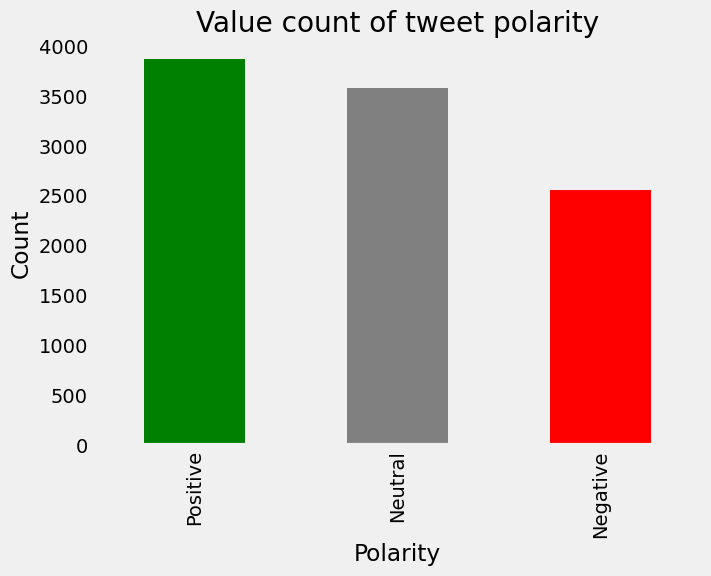

In [23]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive, 'Negative', 'Neutral']
#plt.bar(xlabel, savedTweets['Analysis'].value_counts(), color = color)
color = ['green', 'grey', 'red']
savedTweets['Analysis'].value_counts().plot(kind='bar', color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of Polarity')

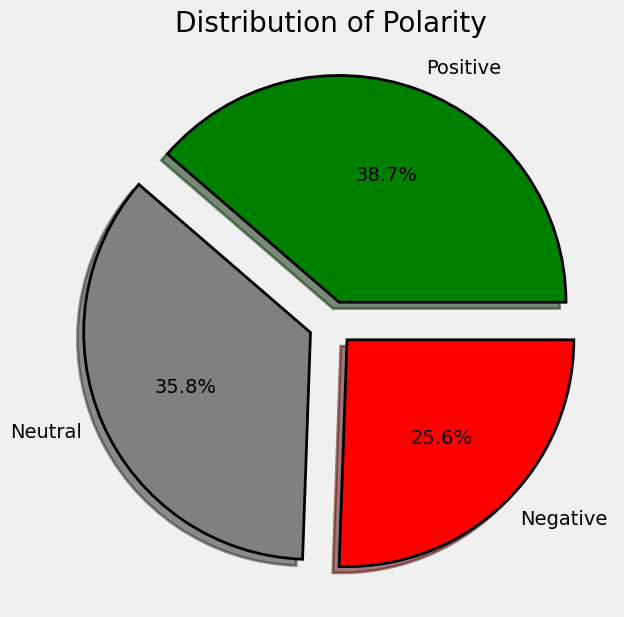

In [24]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize = (7,7))
colors = ('green', 'grey', 'red')
wp = {'linewidth':2, 'edgecolor': 'black'}
tags = savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors, wedgeprops = wp, explode = explode, label = '')
plt.title('Distribution of Polarity')

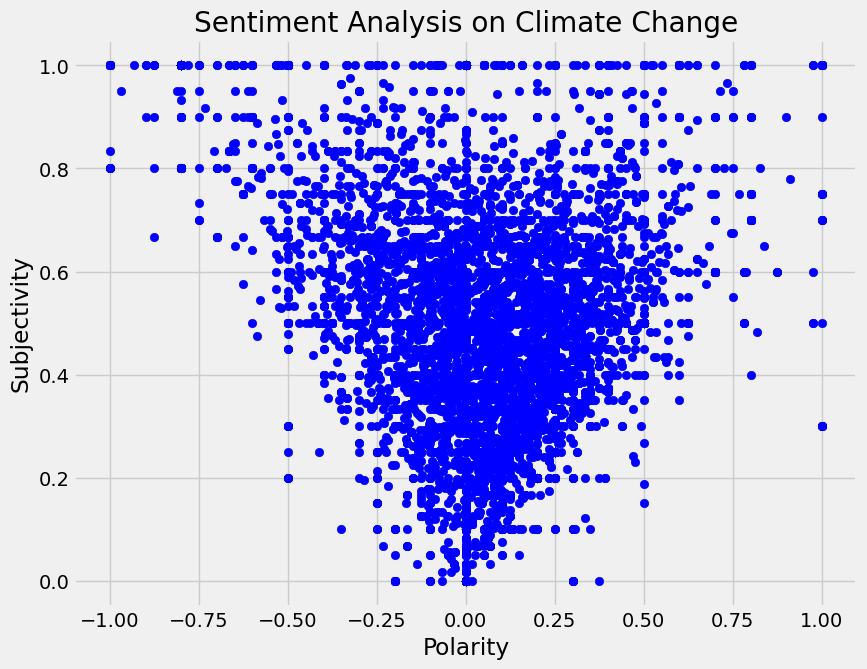

In [25]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i], savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis on Climate Change')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
#create a function for wordcloud
def create_wordcloud(text):
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(10,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

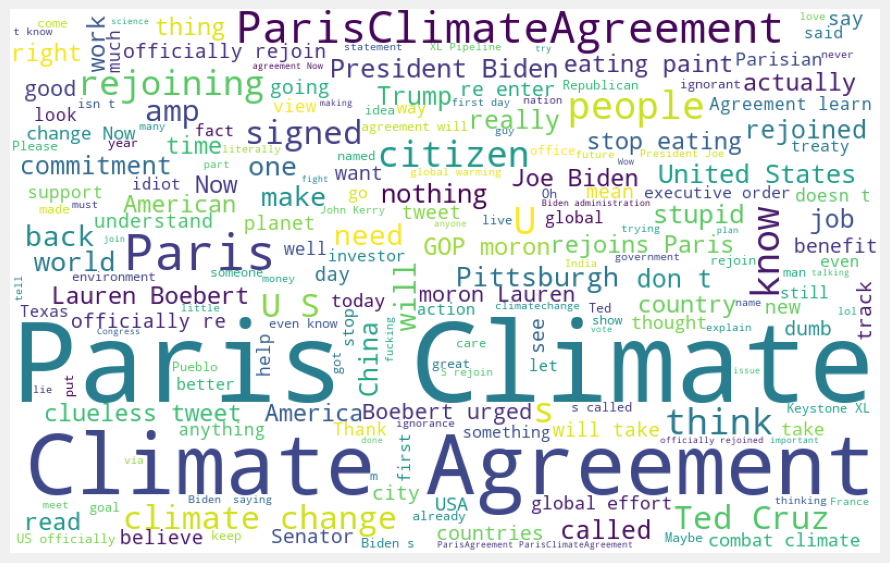

In [27]:
#plot wordcloud for all tweets
allTweets = savedTweets['cleanedTweets']
create_wordcloud(allTweets)

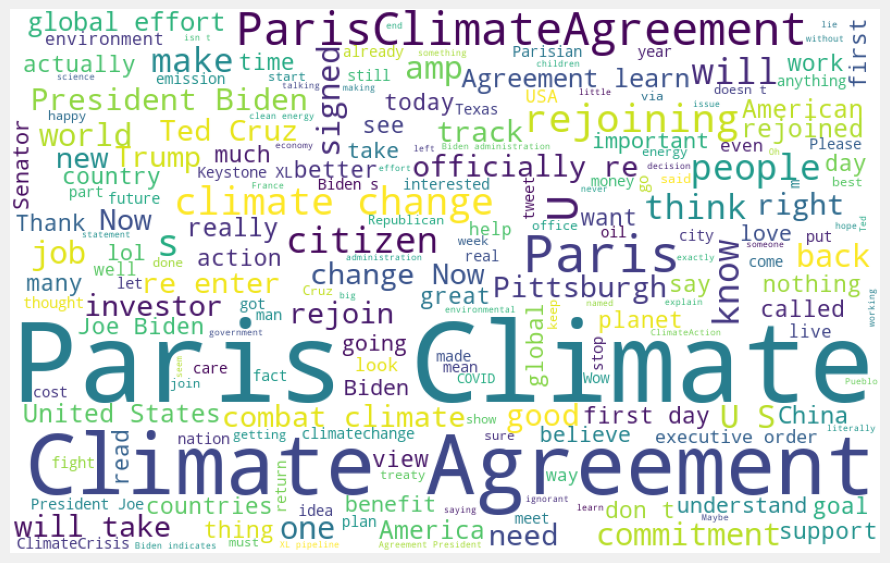

In [28]:
#create wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)

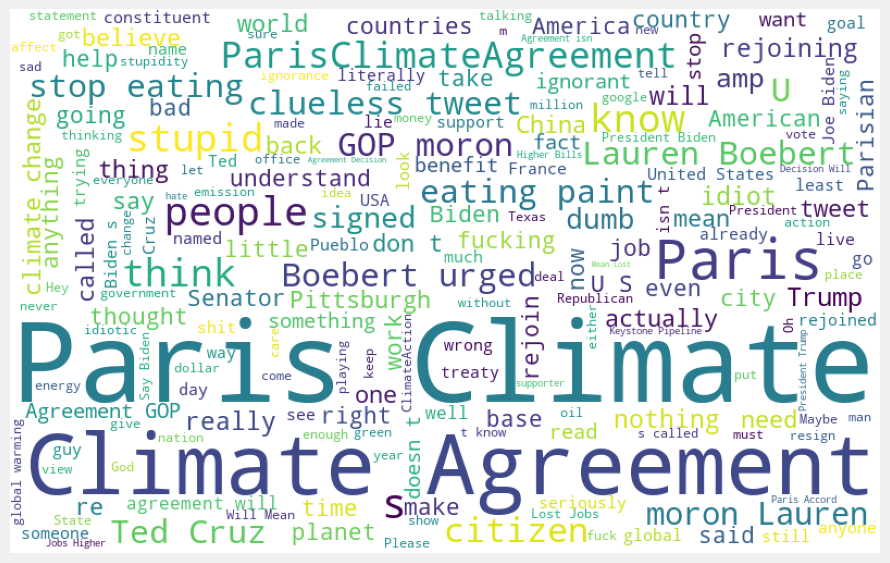

In [29]:
#create wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

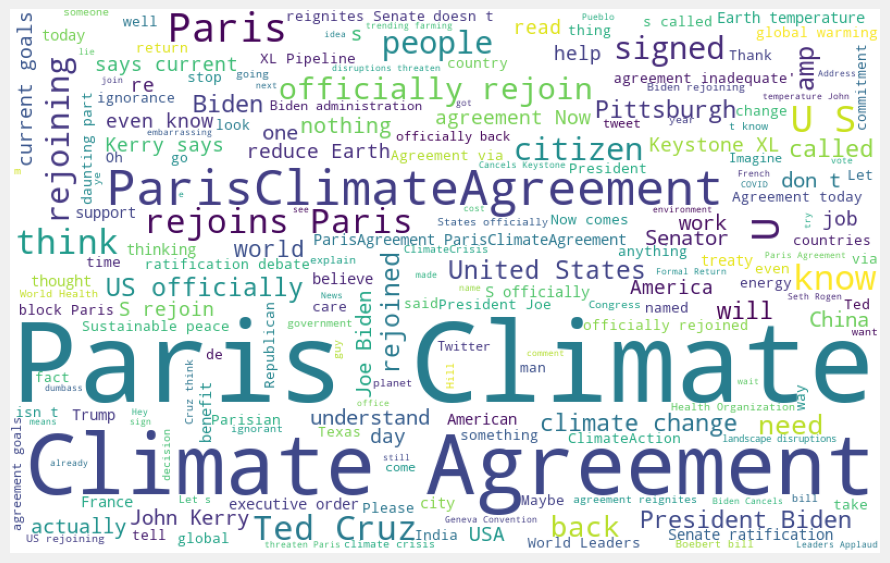

In [30]:
#create wordcloud for neutral tweets
neuTweets = savedTweets.loc[savedTweets['Analysis']=='Neutral', 'cleanedTweets']
create_wordcloud(neuTweets)

In [31]:
savedTweets.shape[0] #shows total rows of tweets

10001

In [32]:
# get the percentage of positive tweets
pTweets = savedTweets[savedTweets['Analysis']=='Positive']
pTweets = pTweets['cleanedTweets']
percentage = round((pTweets.shape[0]/savedTweets.shape[0]) *100, 1)
print('Percentage of positive tweets: {0}%'.format(percentage))

Percentage of positive tweets: 38.7%


In [33]:
# get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100, 1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 25.6%


In [34]:
# get the percentage of neutral tweets
neutTweets = savedTweets[savedTweets['Analysis']=='Neutral']
neutTweets = neutTweets['cleanedTweets']
percentage = round((neutTweets.shape[0]/savedTweets.shape[0]) *100, 1)
print('Percentage of neutral tweets: {0}%'.format(percentage))

Percentage of neutral tweets: 35.8%


In [35]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences

lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10]

['🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽',
 'We',
 'don’t',
 'have',
 '“Democrat”',
 'or',
 '“Republican”',
 'air.',
 'We',
 'must']

In [36]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]    

['🤝✊🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽👏🏽',
 'we',
 "don't",
 'have',
 '“democrat”',
 'or',
 '“republican”',
 'air.',
 'we',
 'must',
 'do',
 'better',
 'for',
 'our',
 'children.',
 'parisclimateagr',
 'climatecrisi',
 'thank',
 'you',
 'yes!']

In [37]:
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#stem2[:20]

In [38]:
#creates a new dataframe for the stem
df = pd.DataFrame(stem2)
df = df[0].value_counts()
df

climat           9798
pari             9506
agreement        6175
rejoin           2000
biden            1546
                 ... 
scipol              1
greenhousegas       1
involved!           1
barbi               1
subnorm             1
Name: 0, Length: 19990, dtype: int64

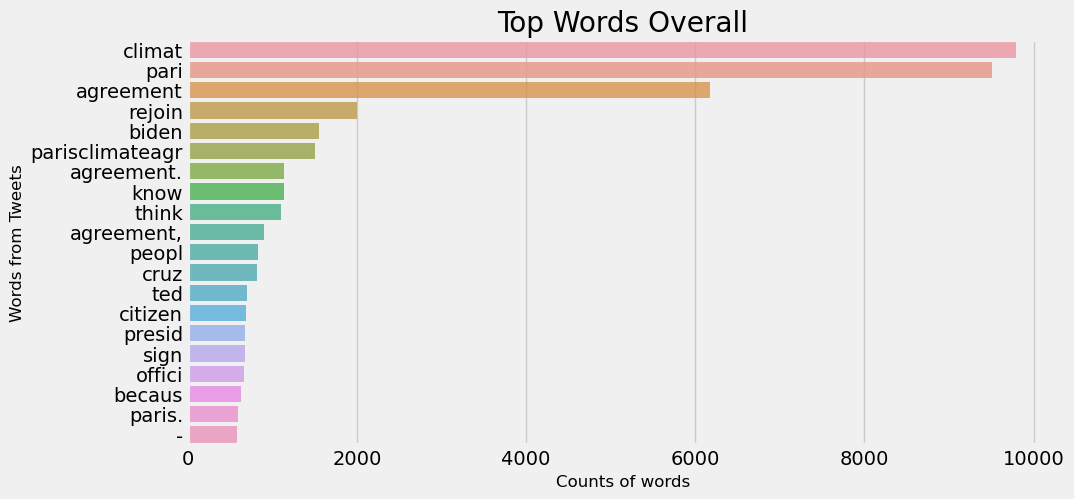

In [39]:
#plot the top 20 used words
import warnings
warnings.filterwarnings('ignore')
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Counts of words', fontsize=12)
plt.ylabel('Words from Tweets', fontsize=12)
plt.show()